## Análise Tnah

In [130]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [293]:
# lendo dados
DATA_REGISTROSCOLETADOS = '/home/thiago/Documentos/Thiago/Analise_Tnah/Export_Table/registroscoletados.csv'
DATA_ORDENSPRODUCAO = '/home/thiago/Documentos/Thiago/Analise_Tnah/Export_Table/ordensproducao.csv'
DATA_EVENTOS = '/home/thiago/Documentos/Thiago/Analise_Tnah/Export_Table/eventos.csv'

# importando dados
df_rc = pd.read_csv(DATA_REGISTROSCOLETADOS, low_memory = False)
df_op = pd.read_csv(DATA_ORDENSPRODUCAO, low_memory = False)
df_eventos = pd.read_csv(DATA_EVENTOS, low_memory = False)

# dimensoes do dataset
print('Dimenssoes do Dataset Registros Coletados: \n',
     'Numeros de linhas: ', df_rc.shape[0], '\n',
     'Numero de colunas: ', df_rc.shape[1])
print('-----------------------------------------------')

print('Dimenssoes do Dataset Orden de Compra: \n',
     'Numeros de linhas: ', df_op.shape[0], '\n',
     'Numero de colunas: ', df_op.shape[1])
print('-----------------------------------------------')

print('Dimenssoes do Datase Eventost: \n',
     'Numeros de linhas: ', df_eventos.shape[0], '\n',
     'Numero de colunas: ', df_eventos.shape[1])
print('-----------------------------------------------')

# mostrar todas as colunas
pd.set_option('display.max_columns', 50) 

Dimenssoes do Dataset Registros Coletados: 
 Numeros de linhas:  37427 
 Numero de colunas:  39
-----------------------------------------------
Dimenssoes do Dataset Orden de Compra: 
 Numeros de linhas:  1886 
 Numero de colunas:  16
-----------------------------------------------
Dimenssoes do Datase Eventost: 
 Numeros de linhas:  209 
 Numero de colunas:  18
-----------------------------------------------


### Quantidade de OP por evento = 1 (em produção)

In [156]:
# quantidade de orden de producao por evento = 1 (em producao)
df01 = df_rc[['CODORDEMPRODUCAO','IDEVENTO']]
df01.loc[df01.IDEVENTO == 1.0].value_counts()
#df01.loc[df01.IDEVENTO == 1.0].count()

CODORDEMPRODUCAO  IDEVENTO
55499.0           1.0         4465
55942.0           1.0         3921
55990.0           1.0         3745
55925.0           1.0         3672
55776.0           1.0         3495
55418.0           1.0         2772
55945.0           1.0         2621
55993.0           1.0         1804
56029.0           1.0         1443
55468.0           1.0          935
55619.0           1.0          539
55904.0           1.0          509
56021.0           1.0          405
55509.0           1.0          198
55121.0           1.0           99
54772.0           1.0           84
56017.0           1.0           71
55808.0           1.0           62
55888.0           1.0           39
55029.0           1.0            1
dtype: int64

### Orden de produção que mais foi produzida 

In [343]:
# produto que mais foi produzido
df_op[df_op['CODORDEMPRODUCAO'] == 55499]

,IDORDEMPRODUCAO,IDCLIENTE,IDORGANIZACAO,IDSTATUS,IDPROGRAMACAO,IDITEM,CODORDEMPRODUCAO,NOME,DATAINICIO,DATAFIM,QUANTIDADE,IDORDEMTIPO,DATACRIACAO,DATAMODIFICACAO,IDUSUARIOCRIACAO,IDUSUARIOMODIFICACAO
1670,1761,1011,1,1,1,179,55499,13295336 CORPO INTERRUPTOR SIMPLES PAR COMP CINZA,2022-06-14 00:00:00.000,2022-07-08 00:00:00.000,130000.0,NaN,2022-06-14 11:37:43.540,2022-07-11 17:51:40.773,16,1


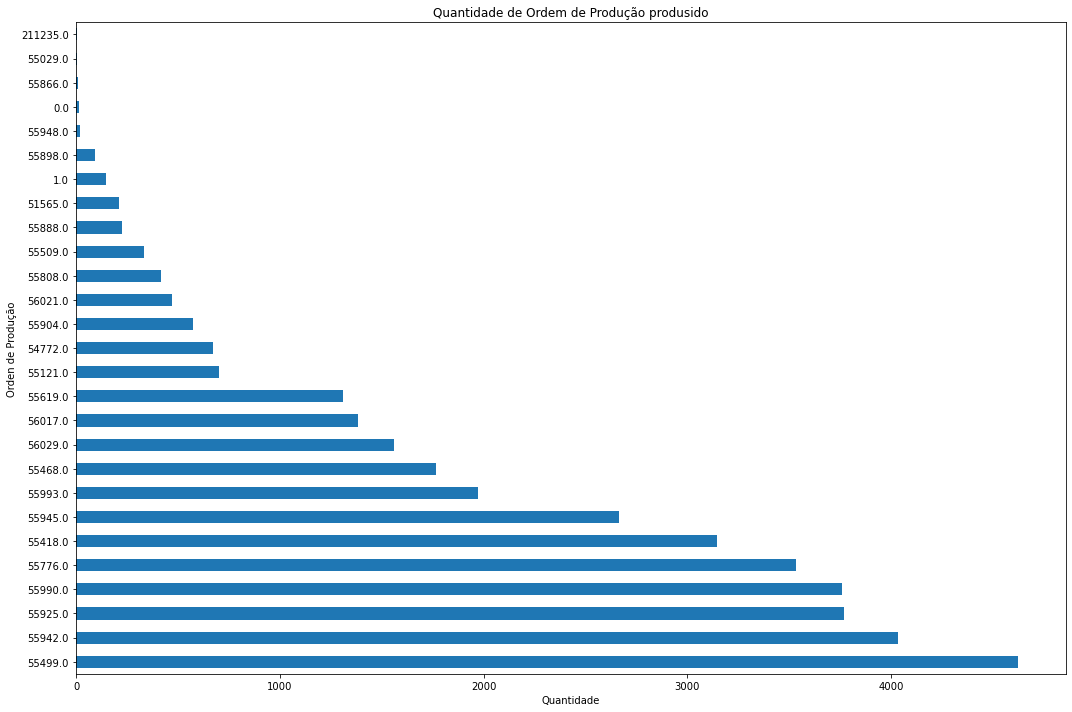

In [262]:
# grafico de barras
fig, ax = plt.subplots(figsize=(15,10))
df_rc['CODORDEMPRODUCAO'].value_counts().plot(kind='barh')
ax.set_title('Quantidade de Ordem de Produção produsido')
ax.set_ylabel('Orden de Produção')
ax.set_xlabel('Quantidade')
plt.tight_layout()

In [294]:
# conveter coluna para formato de data
df_rc['DATAHORAINICIO'] = pd.to_datetime(df_rc['DATAHORAINICIO'])
df_rc['DATAHORAFIM'] = pd.to_datetime(df_rc['DATAHORAFIM'])
df_rc['DATACRIACAO'] = pd.to_datetime(df_rc['DATACRIACAO'])

In [204]:
# calcular o tempo de duração
df_rc_duracao = df_rc['DATAHORAFIM'] - df_rc['DATAHORAINICIO']

In [215]:
# adicioando resultado ao dataframe
df_rc['Duracao'] = df_rc_duracao

In [218]:
# 
df_rc_duracao02 = df_rc[['CODORDEMPRODUCAO', 'DATAHORAINICIO', 'DATAHORAFIM', 'Duracao']]

### Analise estatística referente ao tempo de execução da OP

In [239]:
# mostrando a estatiscticas da duração
df_rc_duracao02.describe().round()

,CODORDEMPRODUCAO,Duracao
count,37421.0,37239
mean,55516.0,0 days 00:00:22.010337012
std,3896.0,0 days 00:04:37.384635795
min,0.0,0 days 00:00:00
25%,55499.0,0 days 00:00:10.600000
50%,55925.0,0 days 00:00:16.010000
75%,55945.0,0 days 00:00:19.410000
max,211235.0,0 days 07:59:58.930000


### Tempo mínimo, máximo e médiade cada produção.

In [261]:
# 
print('Duracao máxima: \n\n',
      'Orden de produção 211235 \n',
      'DATAHORAINICIO      2022-07-08 23:59:40.520000 \n',
      'DATAHORAFIM         2022-07-08 23:59:52.530000 \n',
      'Duracao                 0 days 07:59:58.930000')
print('------------------------------------------------------')

print('Duracao média: \n\n',
      'Duracao             0 days 00:00:22.010337012')
print('------------------------------------------------------')

print('Duracao máxima: \n\n',
     'CODORDEMPRODUCAO                      211235.0 \n',
     'DATAHORAINICIO      2022-07-08 23:59:40.520000 \n',
     'DATAHORAFIM         2022-07-08 23:59:52.530000 \n',
     'Duracao                 0 days 07:59:58.930000')

Duracao máxima: 

 Orden de produção 211235 
 DATAHORAINICIO      2022-07-08 23:59:40.520000 
 DATAHORAFIM         2022-07-08 23:59:52.530000 
 Duracao                 0 days 07:59:58.930000
------------------------------------------------------
Duracao média: 

 Duracao             0 days 00:00:22.010337012
------------------------------------------------------
Duracao máxima: 

 CODORDEMPRODUCAO                      211235.0 
 DATAHORAINICIO      2022-07-08 23:59:40.520000 
 DATAHORAFIM         2022-07-08 23:59:52.530000 
 Duracao                 0 days 07:59:58.930000


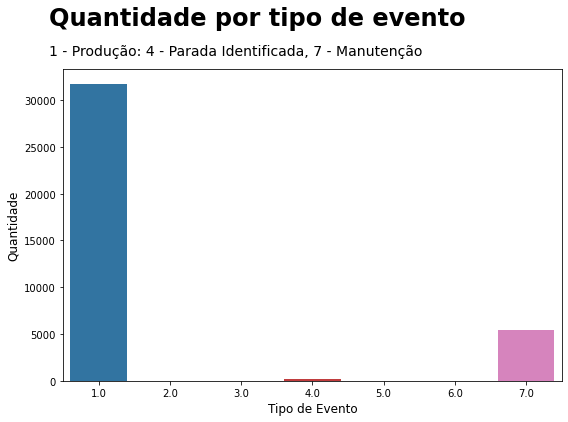

In [345]:
#
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df_rc, x='IDEVENTOTIPO', ax=ax)
# titulo
ax.text(-0.7,37990, 'Quantidade por tipo de evento', fontsize=24, fontweight='bold')
ax.text(-0.7,34850, '1 - Produção: 4 - Parada Identificada, 7 - Manutenção', fontsize=14)
plt.xlabel('Tipo de Evento', size=12)
plt.ylabel('Quantidade', size=12)
plt.tight_layout()

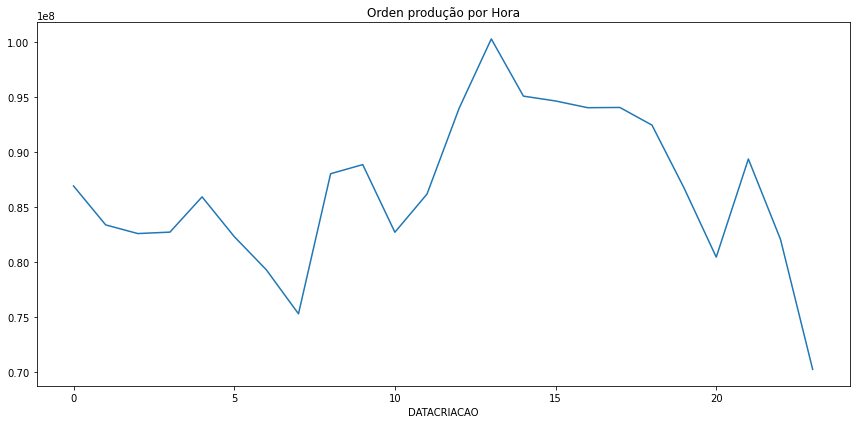

In [316]:
fig, ax = plt.subplots(figsize=(12,6))
df_rc.groupby(df_rc['DATACRIACAO'].dt.hour)['CODORDEMPRODUCAO'].sum().plot.line()
ax.set_title('Orden produção por Hora')
plt.tight_layout()